# Maze Score and Performance Analysis

In [62]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## Load the data

In [63]:
# Load the data from the CSV file
csv_file_path = 'complete.csv'  # Update this to the correct path where your file is located
data = pd.read_csv(csv_file_path)
data.head()

,Participant,Run,Velocity(m/s),Delay(ms),Time(s),Maze Score,Mental Demand,Physical Demand,Temporal Demand,Performance,Effort,Frustration,Overall Score
0,1,1,3.6,500,98.53,57.89,24,42,65,50,70,90,56.833333
1,2,1,6.0,0,20.71,60.53,50,40,20,33,44,98,47.500000
2,3,1,5.0,250,72.55,43.86,50,60,40,90,80,60,63.333333
3,4,1,6.0,2000,75.90,39.10,40,40,20,30,50,75,42.500000
4,5,1,3.6,1000,71.40,65.61,20,0,0,80,10,0,18.333333


## 1. Descriptive Statistics

In [64]:
# Display descriptive statistics
print("Descriptive Statistics:")
data.describe().T


Descriptive Statistics:


,count,mean,std,min,25%,50%,75%,max
Participant,24.0,4.500000,2.340568,1.000000,2.7500,4.500000,6.250,8.000000
Run,24.0,2.000000,0.834058,1.000000,1.0000,2.000000,3.000,3.000000
Velocity(m/s),24.0,4.100000,1.419124,2.200000,3.2500,3.600000,5.000,6.000000
Delay(ms),24.0,843.750000,758.332338,0.000000,250.0000,500.000000,1250.000,2000.000000
Time(s),24.0,73.459583,28.447914,20.710000,52.8875,74.225000,97.600,115.450000
Maze Score,24.0,40.449167,19.368465,0.000000,32.2325,35.995000,53.800,91.300000
Mental Demand,24.0,42.250000,21.145973,10.000000,30.0000,40.000000,50.000,90.000000
Physical Demand,24.0,8.208333,17.472909,0.000000,0.0000,0.000000,5.000,60.000000
Temporal Demand,24.0,32.708333,21.818379,0.000000,20.0000,30.000000,50.000,75.000000
Performance,24.0,61.375000,19.374597,20.000000,50.0000,65.000000,76.250,90.000000


## 2. Correlation Matrix

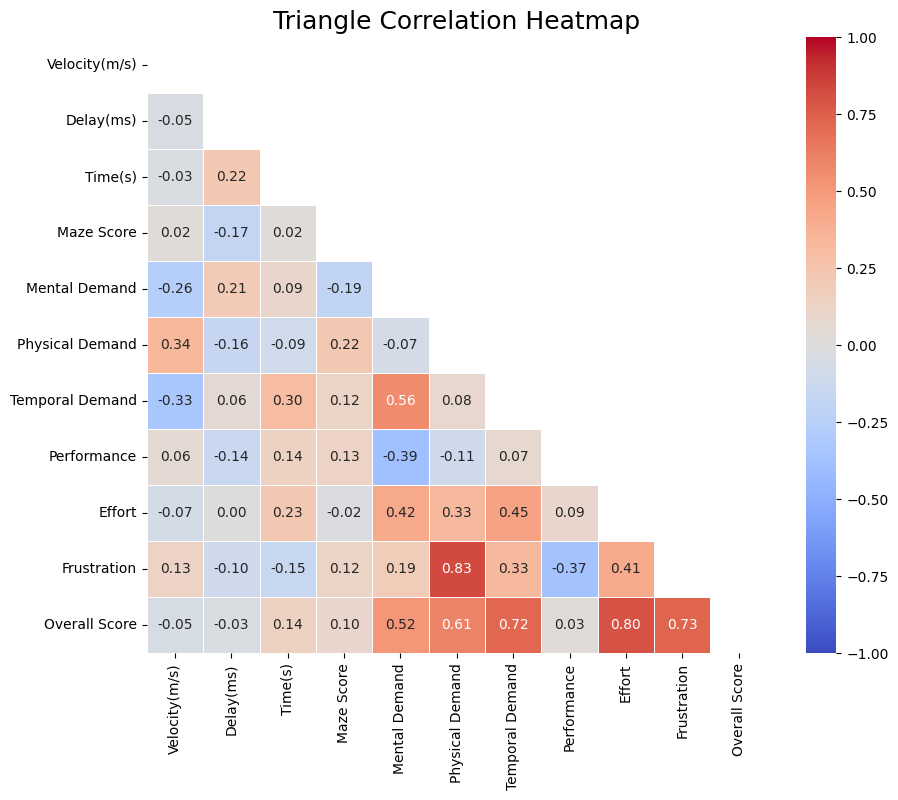

In [103]:
# Convert columns to numeric, coercing errors to NaN (skip 'Participant' and 'Run' columns)
data_numeric = data.drop(columns=['Participant', 'Run']).apply(pd.to_numeric, errors='coerce')

# Generate the correlation matrix to compare the relationship between variables
correlation_matrix = data_numeric.corr()

# Create a mask to display only the lower triangle of the correlation matrix
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Plot the triangle correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap="coolwarm", fmt=".2f", vmin=-1, vmax=1, linewidths=.5)
plt.title("Triangle Correlation Heatmap", fontsize=18)
plt.show()

## 3. Bar plot: Velocity and Delay vs Time Scores

C:\Users\raul_\AppData\Local\Temp\ipykernel_31396\2640145656.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x="Velocity(m/s)",  y="Time(s)", palette="coolwarm", ax=axs[1])


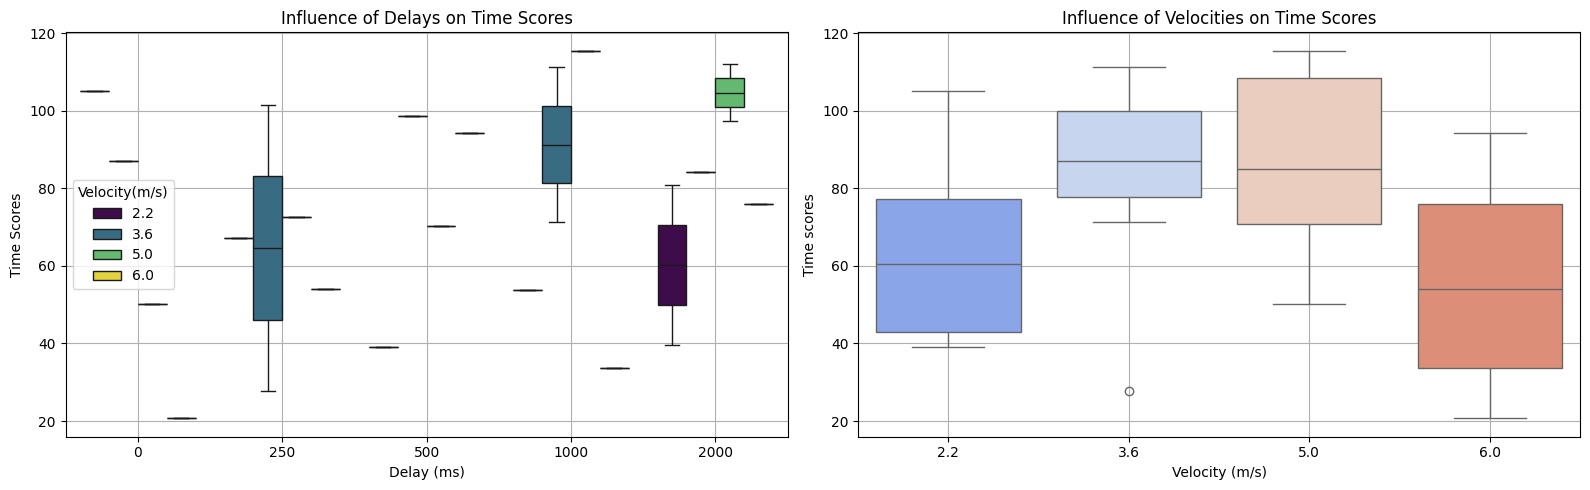

In [109]:
# Box plot: Time scores by delay and velocity
fig, axs = plt.subplots(1, 2, figsize=(16, 5))

# Box plot: Time score vs Delay
sns.boxplot(data=data, x="Delay(ms)", y="Time(s)", palette="viridis", ax=axs[0])
axs[0].set_title("Influence of Delays on Time Scores")
axs[0].set_xlabel("Delay (ms)")
axs[0].set_ylabel("Time Scores")
axs[0].grid(True)

# Box plot: Maze Score vs Velocity
sns.boxplot(data=data, x="Velocity(m/s)",  y="Time(s)", palette="coolwarm", ax=axs[1])
axs[1].set_title("Influence of Velocities on Time Scores")
axs[1].set_xlabel("Velocity (m/s)")
axs[1].set_ylabel("Time scores")
axs[1].grid(True)

# Adjust layout and show the plots
plt.tight_layout()
plt.show()

C:\Users\raul_\AppData\Local\Temp\ipykernel_31396\2075191518.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x="Delay(ms)", y="Maze Score", palette="viridis", ax=axs[0])
C:\Users\raul_\AppData\Local\Temp\ipykernel_31396\2075191518.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x="Velocity(m/s)", y="Maze Score", palette="coolwarm", ax=axs[1])


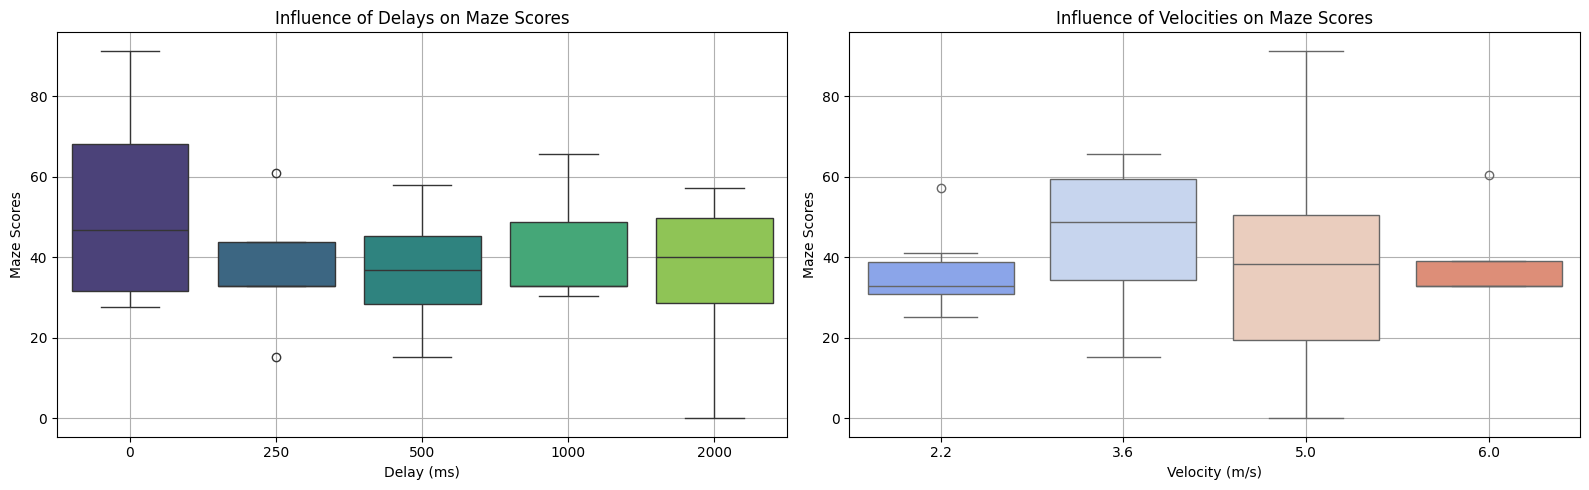

In [106]:
# Set up the figure and two subplots side by side
fig, axs = plt.subplots(1, 2, figsize=(16, 5))

# Box plot: Maze Score vs Delay
sns.boxplot(data=data, x="Delay(ms)", y="Maze Score", palette="viridis", ax=axs[0])
axs[0].set_title("Influence of Delays on Maze Scores")
axs[0].set_xlabel("Delay (ms)")
axs[0].set_ylabel("Maze Scores")
axs[0].grid(True)

# Box plot: Maze Score vs Velocity
sns.boxplot(data=data, x="Velocity(m/s)", y="Maze Score", palette="coolwarm", ax=axs[1])
axs[1].set_title("Influence of Velocities on Maze Scores")
axs[1].set_xlabel("Velocity (m/s)")
axs[1].set_ylabel("Maze Scores")
axs[1].grid(True)

# Adjust layout and show the plots
plt.tight_layout()
plt.show()

## 4. Box plot: Nasa dimensions vs Time delays

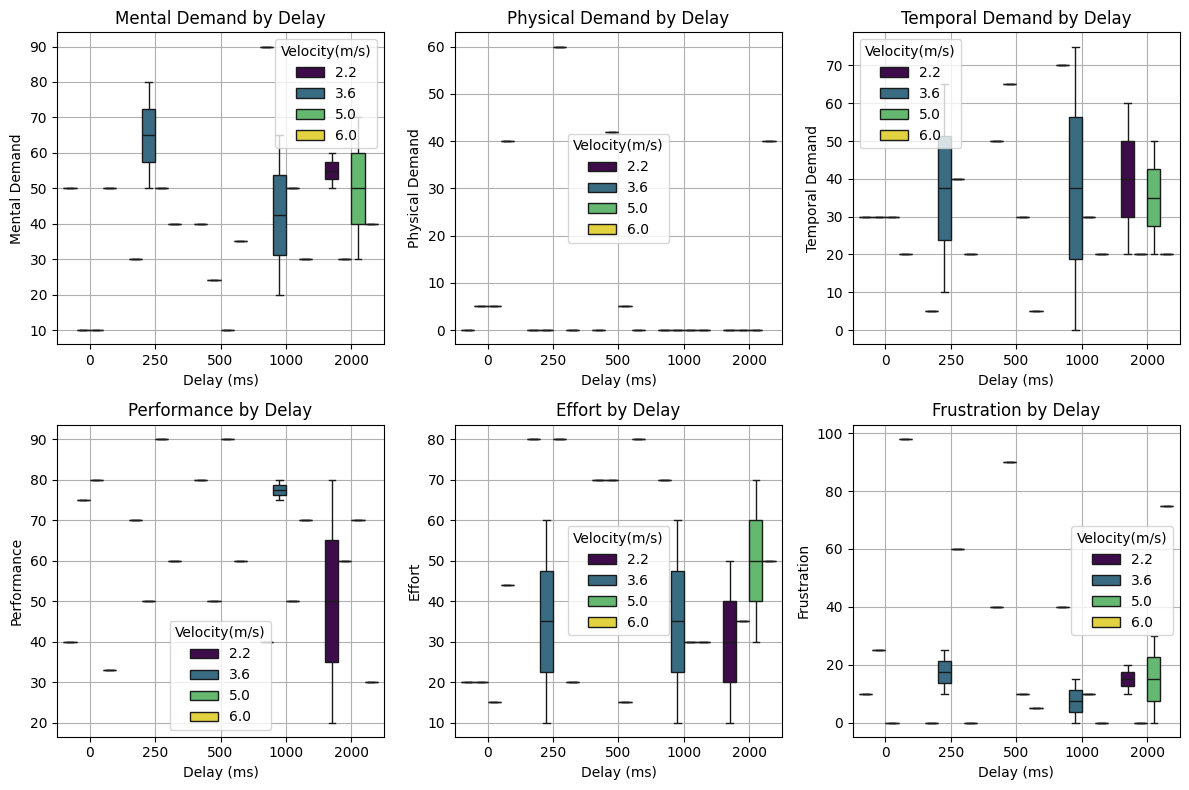

In [80]:
# Let's analyze the NASA-TLX scores by delay using a box plot for each of the NASA-TLX workload dimensions

plt.figure(figsize=(12, 8))

# Box plot for each NASA-TLX dimension categorized by delays
workload_dimensions = ['Mental Demand', 'Physical Demand', 'Temporal Demand', 'Performance', 'Effort', 'Frustration']
for i, dim in enumerate(workload_dimensions, 1):
    plt.subplot(2, 3, i)  # Create a 2x3 grid of plots
    sns.boxplot(data=data, x="Delay(ms)", y=dim, palette="viridis", linewidth=1, hue="Velocity(m/s)")
    plt.title(f"{dim} by Delay")
    plt.xlabel("Delay (ms)")
    plt.ylabel(dim)
    plt.grid(True)

plt.tight_layout()
plt.show()


## 5. Bar plot: Maze Score by Participant

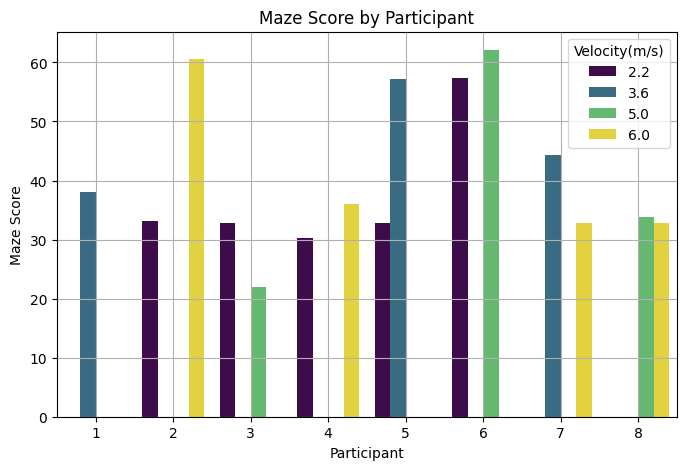

In [83]:
# Bar plot: Mean Maze Score by Participant
plt.figure(figsize=(8, 5))
sns.barplot(data=data, x="Participant", y="Maze Score", errorbar=None, palette="viridis", hue="Velocity(m/s)")
plt.title("Maze Score by Participant")
plt.ylabel("Maze Score")
plt.grid(True)
plt.show()

## 5.1: Time Scores by participant

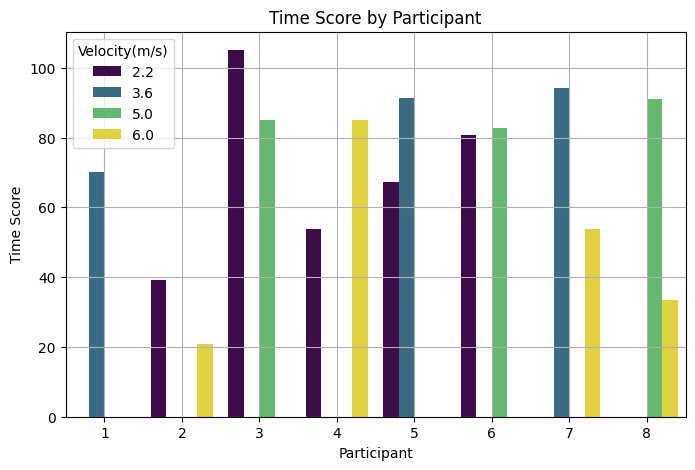

In [84]:
# Bar plot: Mean Maze Score by Participant
plt.figure(figsize=(8, 5))
sns.barplot(data=data, x="Participant", y="Time(s)", errorbar=None, palette="viridis", hue="Velocity(m/s)")
plt.title("Time Score by Participant")
plt.ylabel("Time Score")
plt.grid(True)
plt.show()

## 5.2: Nasa overall score by Participant

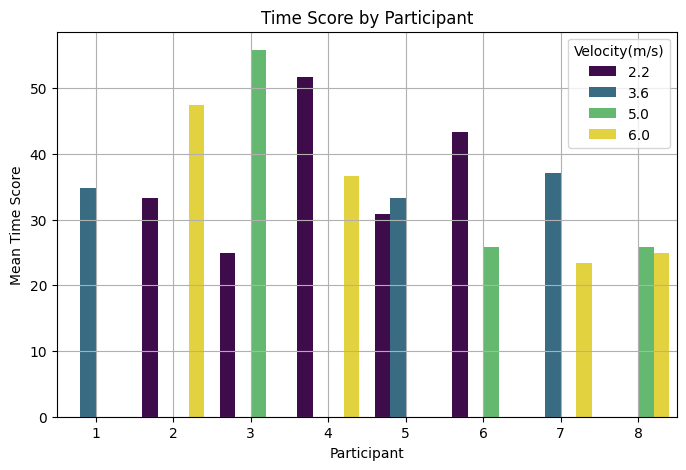

In [85]:
# Bar plot: Mean Maze Score by Participant
plt.figure(figsize=(8, 5))
sns.barplot(data=data, x="Participant", y="Overall Score", errorbar=None, palette="viridis", hue="Velocity(m/s)")
plt.title("Time Score by Participant")
plt.ylabel("Mean Time Score")
plt.grid(True)
plt.show()

## 5.3: Velocity vs time delay

## 6. Histograms: Time and Maze Score distribution

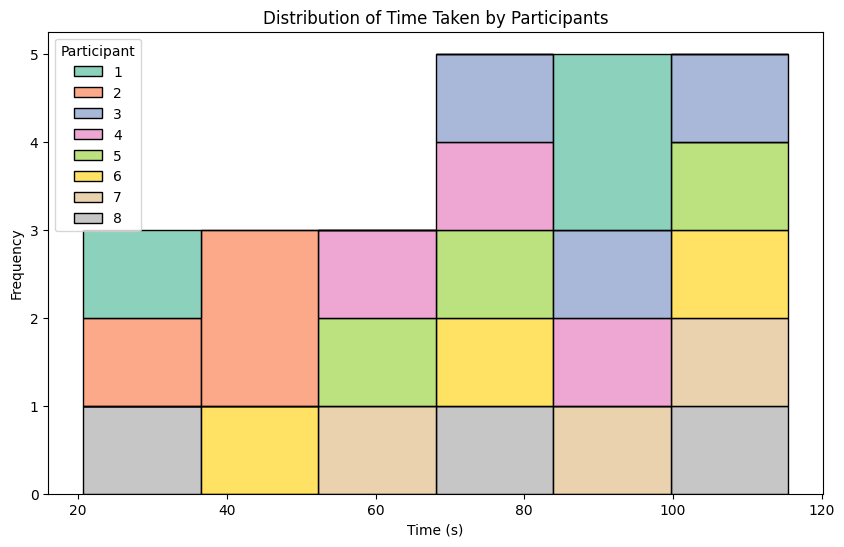

In [72]:
# Distribution of Time taken
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x="Time(s)", hue="Participant", multiple="stack", palette="Set2")
plt.title("Distribution of Time Taken by Participants")
plt.xlabel("Time (s)")
plt.ylabel("Frequency")
plt.show()

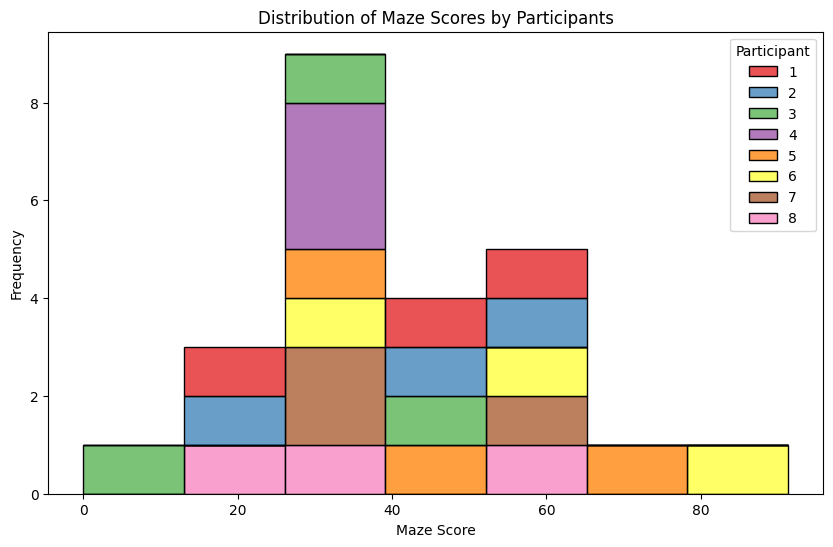

In [73]:
# Distribution of Maze Scores
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x="Maze Score", hue="Participant", multiple="stack", palette="Set1")
plt.title("Distribution of Maze Scores by Participants")
plt.xlabel("Maze Score")
plt.ylabel("Frequency")
plt.show()

## 7. Save analyzed data

In [74]:
# Save the analyzed dataset to a CSV for further analysis if needed
data.to_csv("analyzed_data_output.csv", index=False)